# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

To submit your homework, take the following steps.

1. Save and commit this notebook.
2. Push your changes to GitHub.
3. Confirm that your changes are visible in GitHub.
4. Delete the codespace to avoid wasting your free quota.

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [100]:
import math
import sys

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import zscore
import sklearn.linear_model
from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [102]:
# YOUR CODE HERE
Wine_data = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_white/wine_quality_white.tsv.gz"
Wine_DF = pd.read_csv(Wine_data, sep='\t')
Wine_DF_ten = Wine_DF.drop(columns=['target', 'alcohol'])
random_sample_rows = Wine_DF_ten.sample(n=10, random_state=42)
print(random_sample_rows)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4656            6.0              0.29         0.41           10.80      0.048   
3659            5.4              0.53         0.16            2.70      0.036   
907             7.1              0.25         0.39            2.10      0.036   
4352            7.3              0.28         0.35            1.60      0.054   
3271            6.5              0.32         0.34            5.70      0.044   
4632            6.3              0.30         0.91            8.20      0.034   
2244            7.0              0.36         0.14           11.60      0.043   
1924            7.6              0.26         0.36            1.60      0.032   
3801            8.3              0.18         0.30            1.10      0.033   
2634            8.7              0.31         0.73           14.35      0.044   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  
4656                 55.0       

YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [103]:
# YOUR CODE HERE
columns_names = list(Wine_DF.columns)
print(columns_names)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'target']


YOUR ANSWERS HERE

In [104]:
print("fixed_acidity = non-volatile organic comounds that helps give wine the tartiness taste.")
print("volatile_acidity = volatile acidity compounds such as acetic acid that help show how a wine is such as is it is spolied or good to drink, but can also add unique aromas to the wine.")
print("citic_acid = is used in wines to help regulate acidity and enhance flavors of the certain grapes taht were used.")
print("residual_sugar = amount of left over sugar after fermentation. More left over sugar can mean an increase in sweetness.")
print("chlorides = the salt in the wine which can affect taste meaning a more salty falvor.")
print("free_sulfur_dioxide = The amount of free amount of SO2 in wine which helps prevent prevent bacterial growth.")
print("total_sulfur_dioxide = is the total amount of SO2 in the wine which indcludes the free and bound forms, and acts like an antimicrobial agent")
print("density = measured in g/mL, the density is made up of mostly the sugar and alcohol content, which is usually around 0.99g/mL.")
print("pH = Mostly all wines made are more on the acidic side ranging anywhere from 2.5-4.5 depending on the type of wine such as white, or red. Acidity is based on a sclae od 0-14, with 0-6 being acidic. Lower the number, more acidic it is.")
print("sulphates = act a preservative to make sure wine doesn't spoil fast, becuase of the SO2 properties which act as an antimicrobial in the wine.")
print("alcohol = Usually done in ABV (Alcohol By Volume) measures the contents of alcohol the certain type of batch produces. Content can range from 5%-25%. The higher the ABV the more alcohol and stronger the wine is.")
print("target = another name for quality of wine tests how good the taste is by, the color, alcohol content, sweetnees and the aroma it gives off. All these factors grades the type of wine the as produced causing various types and brands being very expensive.")


fixed_acidity = non-volatile organic comounds that helps give wine the tartiness taste.
volatile_acidity = volatile acidity compounds such as acetic acid that help show how a wine is such as is it is spolied or good to drink, but can also add unique aromas to the wine.
citic_acid = is used in wines to help regulate acidity and enhance flavors of the certain grapes taht were used.
residual_sugar = amount of left over sugar after fermentation. More left over sugar can mean an increase in sweetness.
chlorides = the salt in the wine which can affect taste meaning a more salty falvor.
free_sulfur_dioxide = The amount of free amount of SO2 in wine which helps prevent prevent bacterial growth.
total_sulfur_dioxide = is the total amount of SO2 in the wine which indcludes the free and bound forms, and acts like an antimicrobial agent
density = measured in g/mL, the density is made up of mostly the sugar and alcohol content, which is usually around 0.99g/mL.
pH = Mostly all wines made are more o

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

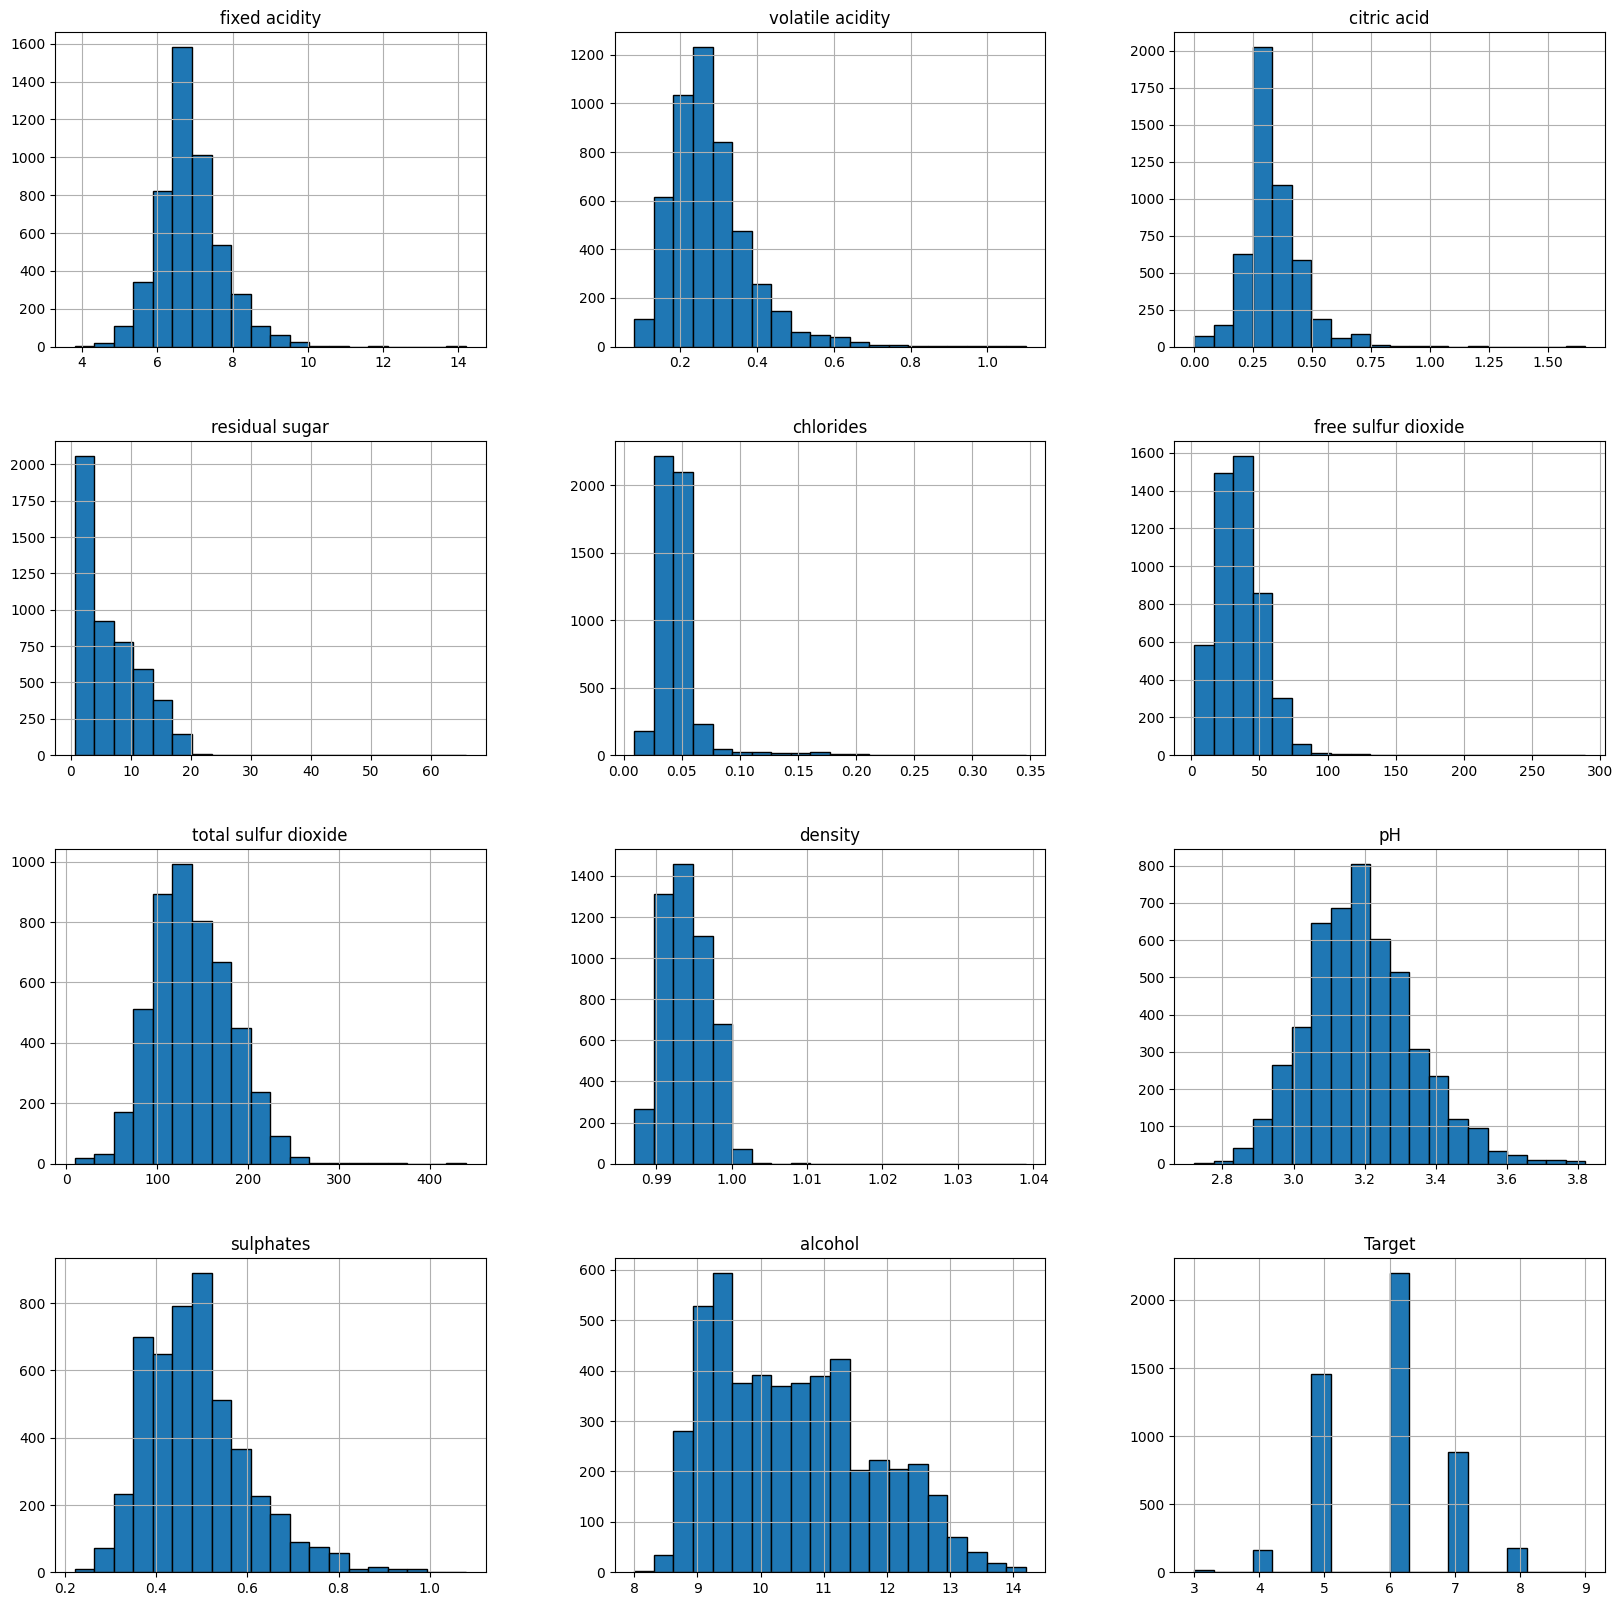

In [105]:
# YOUR CODE HERE
Wine_DF.hist(bins=20, figsize=(20,20), edgecolor='black')
plt.title('Target')
plt.show()


YOUR ANSWERS HERE

In [106]:
print("fixed_acidity = it looks normal with a slight right skew becuase it starts to drop off causing a tail, but has a slight bell curve")
print("volatile_acidity = skewed to the right due to most of the data being piled to the left, and a very obvious tail to the right from a lot of low level values")
print("citric_acid = it looks right skewed due to only one high value, and then starts to drop off causing the tail to the right")
print("residual_sugar = right skewed, which shows a very obious heavy left data all huddle to the left with a spike in low levels and then dipping off into a tail")
print("chlorides = it has the big spike in the middle with a lot of low values as well. You can see the drop off at higher numbers causing the tail to form.")
print("free_sulfur_dioxide = There is a slight spike, but does not show the bell curve. It mainly resmebles a distribution of it being right skewed becuase the data is clumped together at the low end and gives a slight tail.")
print("total_sulfur_dioxide = I would say a slight right skew only becuase it starts to slowly form a tail to the right side witht he higher values, but it does also look slight normal.")
print("density = Also look somewhat normal but does have a slight right skew becuase of the gradual drop off tot he right and tail on the higher values")
print("pH = Does look normal due to the bell curve. There is a slight spike at the middle with a tail forming to the right, but it does look slightly normal with a slight righ skew")
print("sulphates = right skewed due to gradual fall off at higher numbers and an obvious tail to the right.")
print("alcohol = right skew since the data falls off to the right causing the tail.")
print("target = multimodial due to inconsistency of the peaks")

fixed_acidity = it looks normal with a slight right skew becuase it starts to drop off causing a tail, but has a slight bell curve
volatile_acidity = skewed to the right due to most of the data being piled to the left, and a very obvious tail to the right from a lot of low level values
citric_acid = it looks right skewed due to only one high value, and then starts to drop off causing the tail to the right
residual_sugar = right skewed, which shows a very obious heavy left data all huddle to the left with a spike in low levels and then dipping off into a tail
chlorides = it has the big spike in the middle with a lot of low values as well. You can see the drop off at higher numbers causing the tail to form.
free_sulfur_dioxide = There is a slight spike, but does not show the bell curve. It mainly resmebles a distribution of it being right skewed becuase the data is clumped together at the low end and gives a slight tail.
total_sulfur_dioxide = I would say a slight right skew only becuase

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

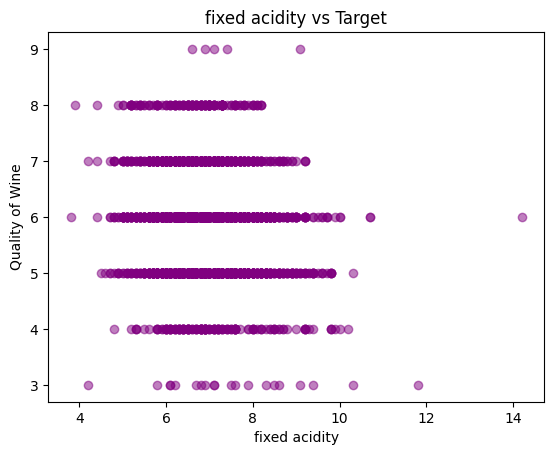

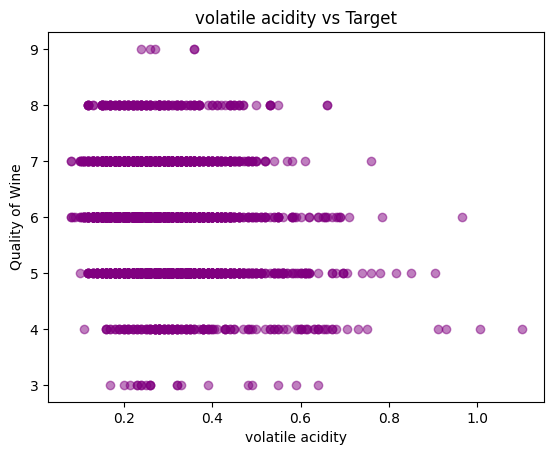

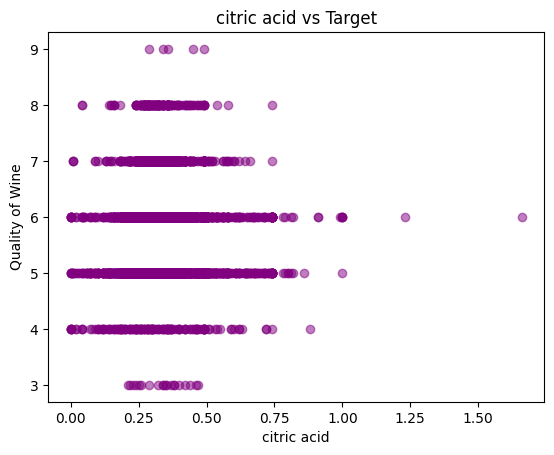

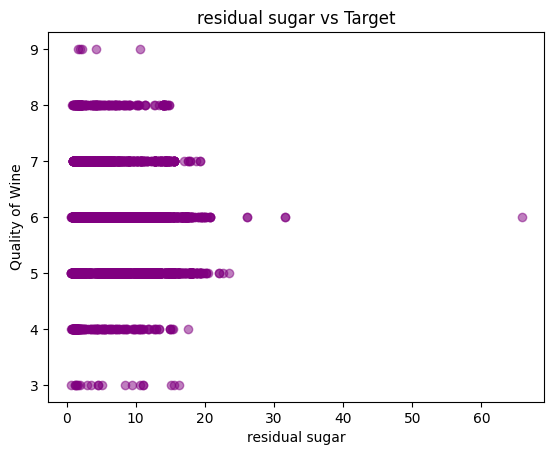

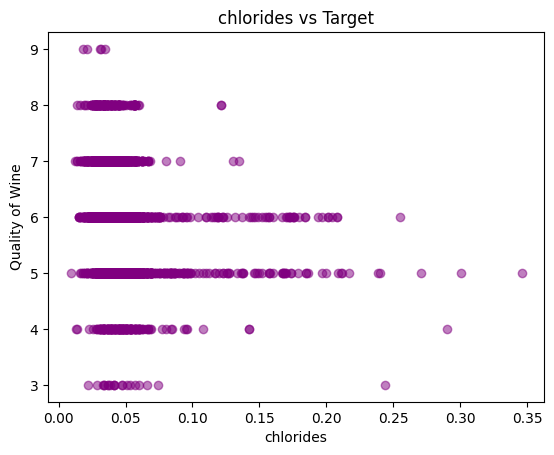

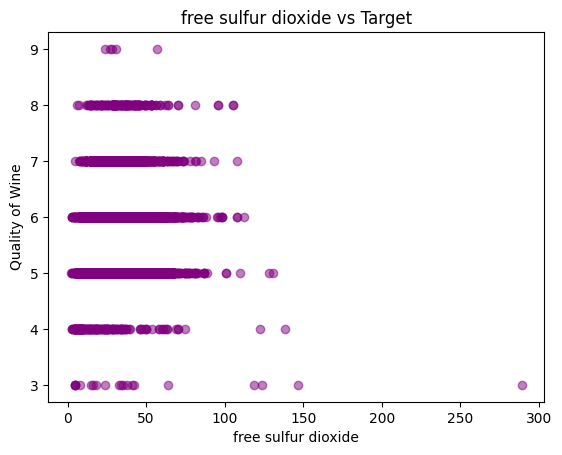

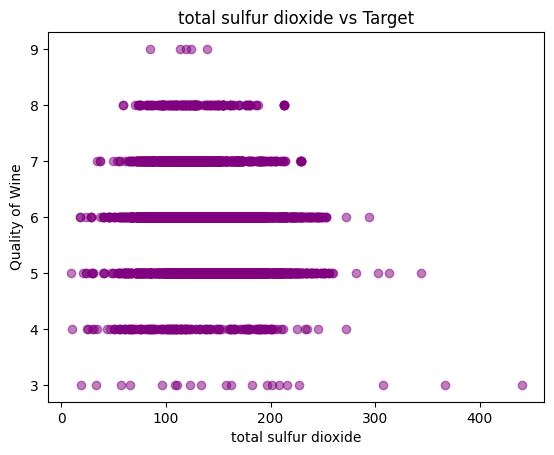

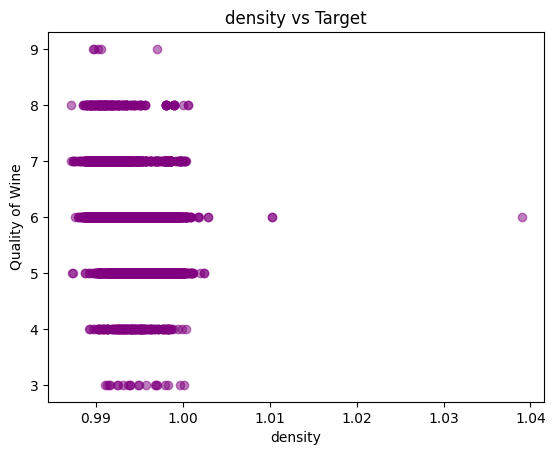

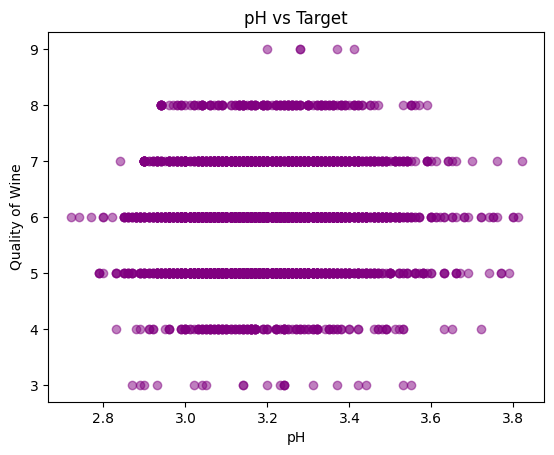

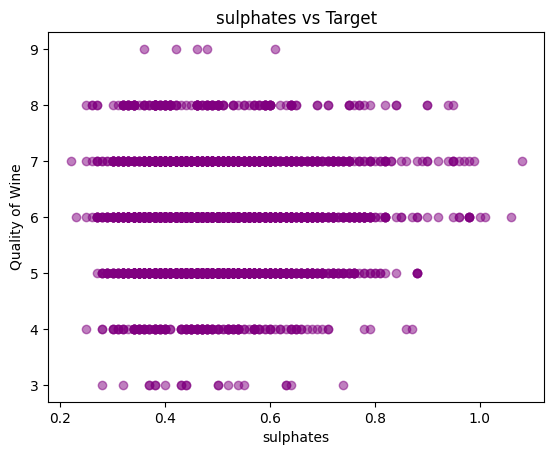

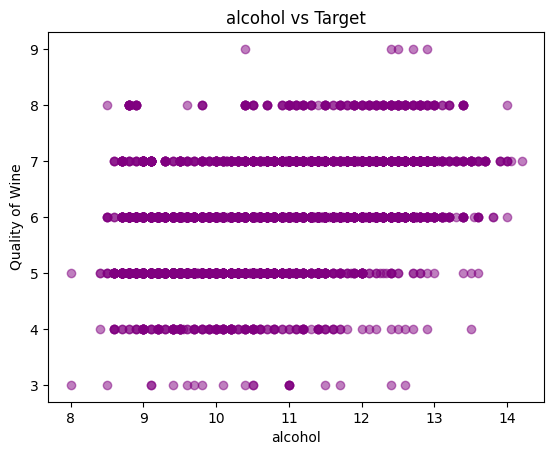

In [107]:
# YOUR CODE HERE
input_columns = Wine_DF.columns.drop('target')
for col in input_columns:
    plt.scatter(Wine_DF[col], Wine_DF['target'], alpha=0.5, color='purple')
    plt.title(f'{col} vs Target')
    plt.xlabel(col)
    plt.ylabel('Quality of Wine')
    plt.show()

YOUR ANSWERS HERE

In [108]:
print("first_plt = With the scatter plot being very clustered it seems like there is no relationship, so the data is independent.")
print("second_plt = higher quality of wine have points more closely together compared to lower quality acidity points are scattered, this would mean this is dependent.")
print("third_plt = for citric acid, like above, the points are close to the quality, but as the citric acid increases until 0.50-0.75, the data falls off. This can tell us that the data is dependent.")
print("fourth_plt = looks like the data is clumped up the the left with no clear increasing or decreasing, this can be classified as independent.")
print("fifth_plt = with chlorides there is a slight pattern of decreasing with quality as more chlorides are introduced. It seemes the data is dependent.")
print("sixth_plt = free sulfur dioxide = just like residual sugar, there is no clear pattern between the quality of wine and free sulfur dioxide, so data is independent.")
print("seventh_plt = total sulfur dioxide, it seems the quaity isn't affected with either adding or decreasing the total sulfure amount and there is not clear pattern. Data is independent")
print("eighth_plt = with density, there is a slight pattern that increasing density does affect quality, so I think it is dependent")
print("ninth_plt = pH seemes to be all over the place and lower or higher of pH does not affect quality, it can be classified as independent")
print("tenth_plt = based on the data as sulphates increase the quality decreases. There is a slight trend in the data, but a clear pattern, so the data is dependent")
print("eleventh_plt = the data looks like as the alcohol content is increasing, the quality of wine increases, which does make sense, most people prefer stronger drinks, so the data is dependent")

first_plt = With the scatter plot being very clustered it seems like there is no relationship, so the data is independent.
second_plt = higher quality of wine have points more closely together compared to lower quality acidity points are scattered, this would mean this is dependent.
third_plt = for citric acid, like above, the points are close to the quality, but as the citric acid increases until 0.50-0.75, the data falls off. This can tell us that the data is dependent.
fourth_plt = looks like the data is clumped up the the left with no clear increasing or decreasing, this can be classified as independent.
fifth_plt = with chlorides there is a slight pattern of decreasing with quality as more chlorides are introduced. It seemes the data is dependent.
sixth_plt = free sulfur dioxide = just like residual sugar, there is no clear pattern between the quality of wine and free sulfur dioxide, so data is independent.
seventh_plt = total sulfur dioxide, it seems the quaity isn't affected wit

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the average loss of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

Mean Squared Error: 0.563


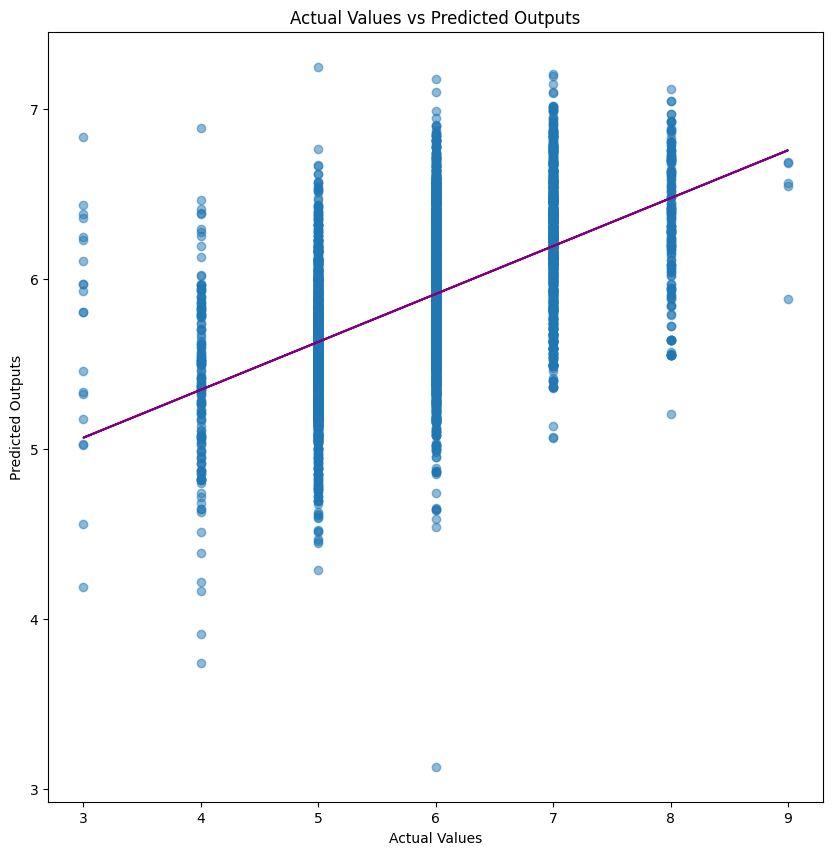

In [109]:
# YOUR CODE HERE
Wine_data = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_white/wine_quality_white.tsv.gz"
Wine_DF = pd.read_csv(Wine_data, sep='\t')
X = Wine_DF.drop(columns=['target']).values
Y = Wine_DF['target'].values
model = sklearn.linear_model.LinearRegression()
model.fit(X, Y)
y_predictions = model.predict(X)
Mean_Squared = np.mean((Y - y_predictions) ** 2)
print(f"Mean Squared Error: {Mean_Squared:.3f}")
plt.figure(figsize=(10,10))
plt.scatter(Y, y_predictions, alpha=0.5)
slope, intercept = np.polyfit(Y, y_predictions, 1)
trend_line = slope * Y + intercept
plt.plot(Y, trend_line, color='Purple', label="y = x")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Outputs')
plt.title('Actual Values vs Predicted Outputs')
plt.show()

YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [110]:
# YOUR CODE HERE
X_input = Wine_DF.drop(columns=['target'])
Y_input = Wine_DF['target']
Mean_Squared_error_individually = {}
for feature in X_input.columns:
    X_Individually = X_input[[feature]].values
    model = sklearn.linear_model.LinearRegression()
    model.fit(X_Individually, Y_input)
    y_predictions_Individually = model.predict(X_Individually)
    Mean_Squared = np.mean((Y_input - y_predictions_Individually) ** 2)
    Mean_Squared_error_individually[feature] = Mean_Squared
best_model = min(Mean_Squared_error_individually, key=Mean_Squared_error_individually.get)
best_model_MSE = Mean_Squared_error_individually[best_model]
print(f"Best Model: {best_model}")
print(f"Best model feature: {best_model_MSE:.4f}")
model_compare = sklearn.linear_model.LinearRegression()
model_compare.fit(X_input.values, Y_input)
y_predictions_compare = model_compare.predict(X_input.values)
Mean_Squared_Error_compare = np.mean((Y_input - y_predictions_compare) ** 2)
print(f"Mean_Squared_Error with all model comparisons: {Mean_Squared_Error_compare:.4f}")

Best Model: alcohol
Best model feature: 0.6354
Mean_Squared_Error with all model comparisons: 0.5632


YOUR ANSWERS HERE

In [111]:
print("Alcohol gives the best linear model target on its own becuase of its MSE of 0.6354. Since it is so strong as a column independently, it ties very well with the target or quality of wine. The data goes hand in hand with each other showing both data features work best together.")

Alcohol gives the best linear model target on its own becuase of its MSE of 0.6354. Since it is so strong as a column independently, it ties very well with the target or quality of wine. The data goes hand in hand with each other showing both data features work best together.


### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.

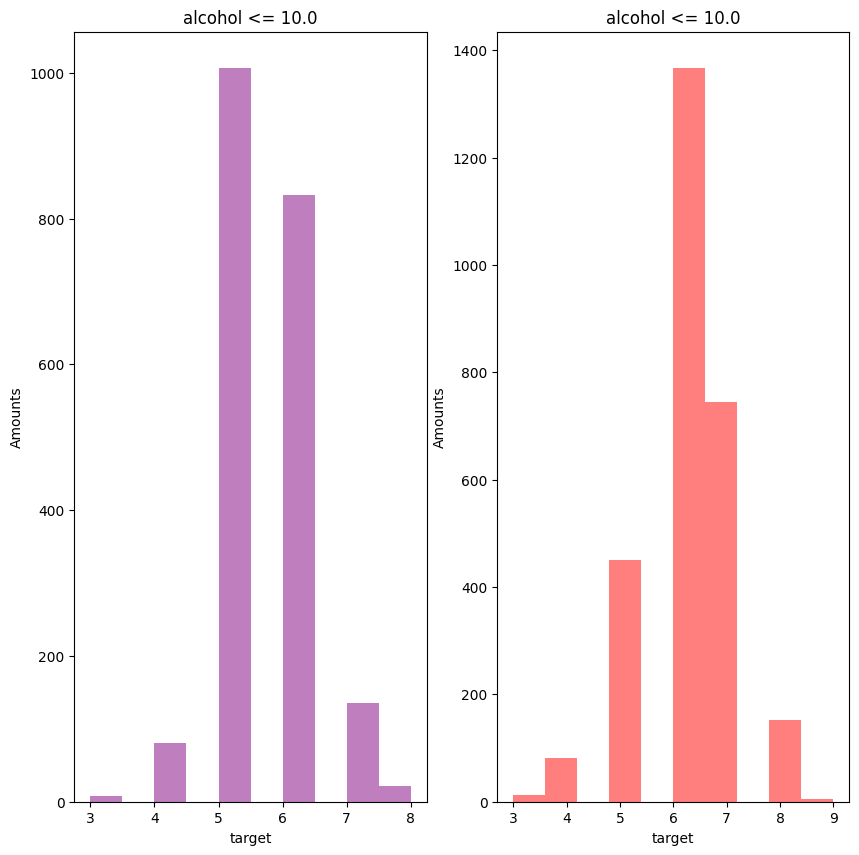

In [112]:
# YOUR CODE HERE
split_column = 'alcohol'
next_column = 'target'
split_values = 10.0
first_split = Wine_DF[Wine_DF[split_column] <= split_values]
second_split = Wine_DF[Wine_DF[split_column] > split_values]
plt.figure(figsize=(10, 10))
plt.subplot(1 , 2, 1)
plt.hist(first_split[next_column], bins=10, alpha=0.5, color='Purple')
plt.title(f'{split_column} <= {split_values}')
plt.xlabel(next_column)
plt.ylabel('Amounts')

plt.subplot(1, 2, 2)
plt.hist(second_split[next_column], bins=10, alpha=0.5, color='red')
plt.title(f'{split_column} <= {split_values}')
plt.xlabel(next_column)
plt.ylabel('Amounts')
plt.show()

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the average training loss of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

PCA with Mean Squared Error: 0.612


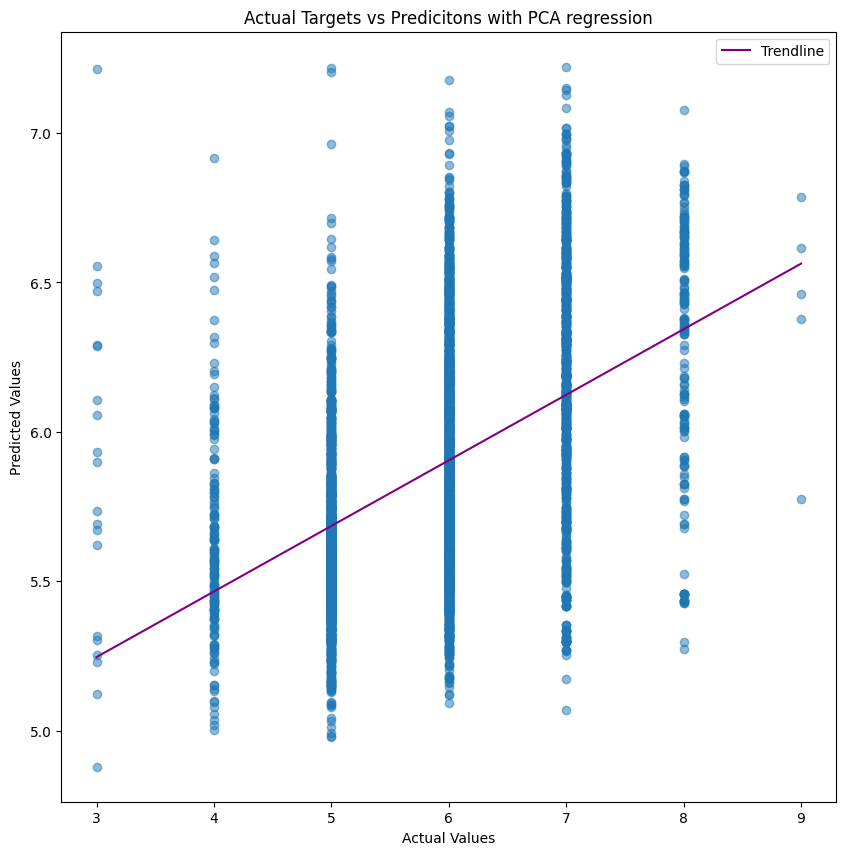

In [113]:
# YOUR CODE HERE
Wine_data = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_white/wine_quality_white.tsv.gz"
Wine_DF = pd.read_csv(Wine_data, sep='\t')
X_input = Wine_DF.drop(columns=['target']).values
Y_input = Wine_DF['target'].values
n_components = X_input.shape[1] // 2
pca = PCA(n_components = n_components)
final_pca = pca.fit_transform(X_input)

model_pca = sklearn.linear_model.LinearRegression()
model_pca.fit(final_pca, Y_input)

y_predictions_pca = model_pca.predict(final_pca)
Mean_Squared_Error_pca = np.mean((Y_input - y_predictions_pca) ** 2)
print(f"PCA with Mean Squared Error: {Mean_Squared_Error_pca:.3f}")

plt.figure(figsize=(10,10))
plt.scatter(Y_input, y_predictions_pca, alpha=0.5,)
slope, intercept = np.polyfit(Y_input, y_predictions_pca, 1)
x_trendline = np.linspace(min(Y_input), max(Y_input), 100)
y_trendline = slope * x_trendline + intercept
plt.plot(x_trendline, y_trendline, color='purple', label='Trendline')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Targets vs Predicitons with PCA regression')
plt.legend()
plt.show()

YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [114]:
# YOUR CODE HERE
X_input = Wine_DF.drop(columns=['target'])
corr_matrix = X_input.corr()
corr_pairs = corr_matrix.abs().unstack()
corr_pairs = corr_pairs[corr_pairs < 1]
highest_pair_corr = corr_pairs.idxmax()
highest_corr = corr_pairs.max()
print(f"Highest Correlation of pairs: {highest_pair_corr}")
print(f"Correlation Reflection: {highest_corr:.3f}")

Highest Correlation of pairs: ('residual sugar', 'density')
Correlation Reflection: 0.839


YOUR ANSWERS HERE

In [115]:
print("The correlation is reflected in the principal components because there is large amounts of variance when these pairs are combined.")

The correlation is reflected in the principal components because there is large amounts of variance when these pairs are combined.


### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria you like, but you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

Outlier row: 2781
fixed acidity             7.80000
volatile acidity          0.96500
citric acid               0.60000
residual sugar           65.80000
chlorides                 0.07400
free sulfur dioxide       8.00000
total sulfur dioxide    160.00000
density                   1.03898
pH                        3.39000
sulphates                 0.69000
alcohol                  11.70000
target                    6.00000
Name: 2781, dtype: float64


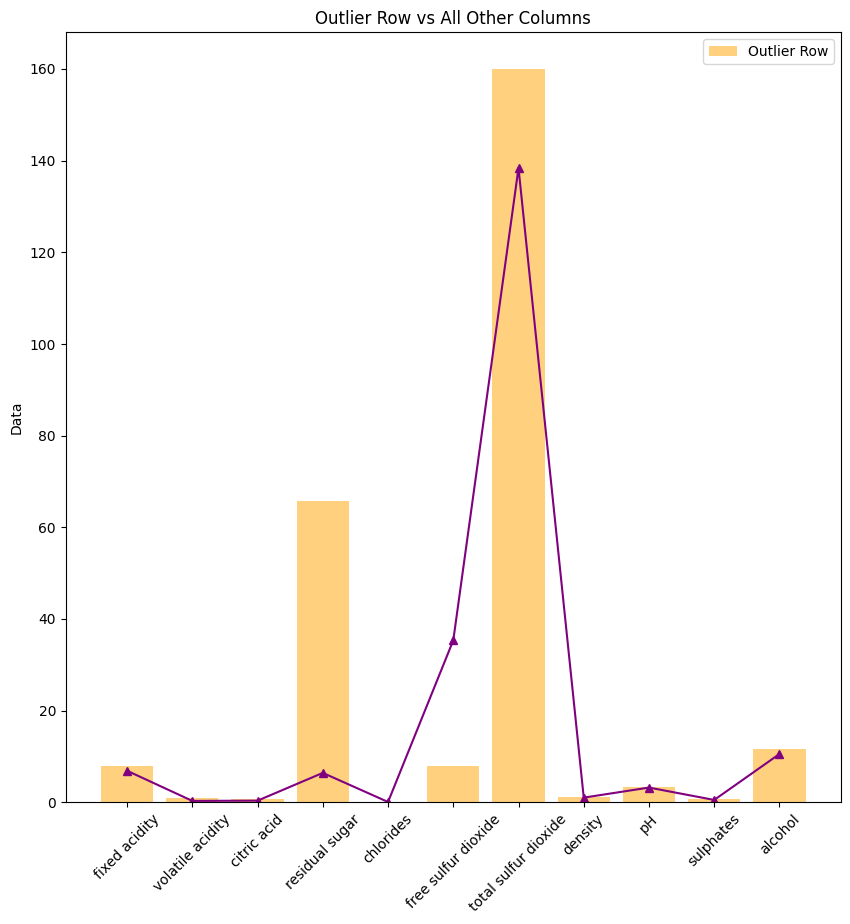

In [116]:
# YOUR CODE HERE
X_input = Wine_DF.drop(columns=['target'])
z_score = np.abs(zscore(X_input))
z_total_rows = z_score.sum(axis=1)
z_outlier = np.argmax(z_total_rows)
outlier_rows = Wine_DF.loc[z_outlier]
print(f"Outlier row: {z_outlier}")
print(outlier_rows)

mean_outlier_rows = X_input.mean()
plt.figure(figsize=(10,10))
data = X_input.columns
plt.bar(data, outlier_rows[data], label='Outlier Row', alpha=0.5, color='orange')
plt.plot(data, mean_outlier_rows, color='purple', marker='^')
plt.xticks(rotation=45)
plt.ylabel('Data')
plt.title('Outlier Row vs All Other Columns')
plt.legend()
plt.show()

YOUR ANSWERS HERE

In [117]:
print("I decide to go with zscore instead of Min-Max normalization.")
print("The reason is the way zscore calculates the standard deviation which makes it easier to spot the outlier as it goes further away from the mean. With using a max-min normalization, it would not be great at detecting outliers based on its fixed range of 0, 1 which can cause sesnsitvity to the data and outliers.")
print("zscore is also best because it has a mean of 0 and a standard deiation of 1, which would not affect outlier data.")

I decide to go with zscore instead of Min-Max normalization.
The reason is the way zscore calculates the standard deviation which makes it easier to spot the outlier as it goes further away from the mean. With using a max-min normalization, it would not be great at detecting outliers based on its fixed range of 0, 1 which can cause sesnsitvity to the data and outliers.
zscore is also best because it has a mean of 0 and a standard deiation of 1, which would not affect outlier data.
